<a href="https://colab.research.google.com/github/CleliaCaetano/Unveiling-Mushroom-Mysteries-A-Python-Powered-Machine-Learning-Journey/blob/main/Unveiling_Mushroom_Mysteries_A_Python_Powered_Machine_Learning_Journey.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

DEGREE: MSc Data Analytics
- Module: Predictive Analytics and Machine Learning using Python
- Assignment Title: Unveiling Mushroom Mysteries: A Python-Powered Machine Learning Journey

Introduction:
This assignment is designed to reinforce the unit's objectives of introducing learners to predictive analytics, machine learning, and artificial intelligence principles. By providing practical exercises and real-world applications, it aims to cultivate students' ability to leverage these techniques to address complex business or social challenges using Python as a tool.

Learning Outcomes:
- LO1. Demonstrate the understanding of basic concepts of dealing with different types of data – ordinal, categorical,
encoding along with collecting, storing and making it ready for processing.
- LO2. Explain the various components of predictive analytics, with the models for regression, classification and
clustering to analyse real-life business problems.
- LO3. Implement various models and work on a project life cycle from end to end to solve an analytical problem
which translates into a business problem solution using machine learning and artificial intelligence.

In [1]:
# Import Libraries:
# Data Processing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats
from sklearn.preprocessing import LabelEncoder
import statsmodels.api as sm

# Visualization
import seaborn as sns # provide statistical graphs
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import plotly.express as px

# We can suppress the warnings messages that may appear when we run our code.
import warnings
warnings.filterwarnings('ignore')

Section 1: Decision Tree and Information Gain Calculations (Hypothetical Mushroom Database)
- In this hypothetical database, each species of mushroom is described by four attributes: cap_shape, cap-color, odor, and habitat.
- Each mushroom species is classified as either edible or poisonous.

In [2]:
# Import data
df = pd.read_csv('Hypothetical Mushroom.csv')
df.head(10)

,cap_shape,cap-color,odor,habitat,class
0,c,w,p,m,edible
1,f,y,n,u,edible
2,f,y,p,u,edible
3,c,w,a,u,edible
4,c,w,a,l,edible
5,c,y,n,l,poisonous
6,f,g,p,m,poisonous
7,b,r,n,l,poisonous
8,b,y,p,m,poisonous
9,c,y,s,m,poisonous


Q1: Entropy of the data with respect to the classification
- What is the entropy of the data with respect to the classification (edible vs. poisonous mushrooms)?

In [3]:
# Function to calculate entropy
def entropy(p1, p2):
    p1 = p1 if p1 > 0 else 1e-10  # Avoid log(0)
    p2 = p2 if p2 > 0 else 1e-10  # Avoid log(0)
    return -p1 * np.log2(p1) - p2 * np.log2(p2)

# Calculate the proportions of 'Edible' and 'Poisonous' mushrooms
class_counts = df['class'].value_counts()
p1 = class_counts['edible'] / class_counts.sum()
p2 = class_counts['poisonous'] / class_counts.sum()

# Calculate entropy
entropy_value = entropy(p1, p2)
print(f"Entropy of the data: {entropy_value}")

Entropy of the data: 1.0


Q2: Information Gain of Cap-Color
- What is the information gain of Cap-Color relative to these training examples? Show the steps in your
calculation.

In [4]:
# Function to calculate entropy for a subset
def subset_entropy(subset):
    class_counts = subset['class'].value_counts()
    p1 = class_counts.get('edible', 0) / class_counts.sum()
    p2 = class_counts.get('poisonous', 0) / class_counts.sum()
    return entropy(p1, p2)

# Calculate the entropy of the original dataset
original_entropy = subset_entropy(df)

# Calculate the weighted entropy after splitting by 'Cap-Color'
cap_color_entropy = sum(
    (len(subset) / len(df)) * subset_entropy(subset)
    for color in df['cap-color'].unique()
    if len(subset := df[df['cap-color'] == color]) > 0
)

# Calculate the information gain
information_gain = original_entropy - cap_color_entropy
print(f"Information Gain for Cap-Color: {information_gain}")

Information Gain for Cap-Color: 0.5145247011117016


Q3: Next Attribute Selection After Cap-Color in a Decision Tree
-  If Cap-Color is the first attribute selected for building a decision tree, what will be the next attribute selected?
Is this answer unique, or could another attribute be selected instead? Justify your answer.

In [5]:
# List of candidate attributes (excluding the target 'class' and the already selected 'cap-color')
attributes = [col for col in df.columns if col not in ['class', 'cap-color']]

# Function to calculate information gain for an attribute
def calculate_information_gain(attribute):
    attribute_entropy = sum(
        (len(subset) / len(df)) * subset_entropy(subset)
        for value in df[attribute].unique()
        if len(subset := df[df[attribute] == value]) > 0
    )
    return original_entropy - attribute_entropy

# Calculate information gain for all attributes
information_gains = {attr: calculate_information_gain(attr) for attr in attributes}

# Get the attribute with the highest information gain
next_attribute = max(information_gains, key=information_gains.get)
print(f"Next attribute selected: {next_attribute}")

Next attribute selected: habitat


Q4: Expected Misclassification Rate for Random Prediction
- Suppose we randomly predict ‘edible’ with probability p1 and predict poisonous with probability p2, where p1
and p2 are the proportions edible and poisonous mushrooms in the data. What is the expected misclassification
rate?

In [6]:
# Calculate the proportions of edible and poisonous mushrooms
p1 = class_counts['edible'] / class_counts.sum()
p2 = class_counts['poisonous'] / class_counts.sum()

# Calculate the expected misclassification rate
misclassification_rate = 1 - max(p1, p2)
print(f"Expected Misclassification Rate: {misclassification_rate}")

Expected Misclassification Rate: 0.5


Section 2: Python Code: Exploratory Data Analysis and Classification Algorithms on Mushroom Dataset


Q5. Python implementation is required to Perform Exploratory Data Analysis (EDA) on the Mushrooms dataset,
which consists of data observations and features. Your EDA should include summary statistics, distribution
analysis, and visualizations of relationships between variables.

In [7]:
# Load dataset
url = "https://raw.githubusercontent.com/usmanakhtar/Mushrooms-dataset/master/mushrooms.csv"
df = pd.read_csv(url)
df.head()

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g


In [8]:
# check the category of each column.
# check which columns contains categorical variables (object) and numerical variables (int64, float64).
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8124 entries, 0 to 8123
Data columns (total 23 columns):
 #   Column                    Non-Null Count  Dtype 
---  ------                    --------------  ----- 
 0   class                     8124 non-null   object
 1   cap-shape                 8124 non-null   object
 2   cap-surface               8124 non-null   object
 3   cap-color                 8124 non-null   object
 4   bruises                   8124 non-null   object
 5   odor                      8124 non-null   object
 6   gill-attachment           8124 non-null   object
 7   gill-spacing              8124 non-null   object
 8   gill-size                 8124 non-null   object
 9   gill-color                8124 non-null   object
 10  stalk-shape               8124 non-null   object
 11  stalk-root                8124 non-null   object
 12  stalk-surface-above-ring  8124 non-null   object
 13  stalk-surface-below-ring  8124 non-null   object
 14  stalk-color-above-ring  

Note: The dataset contains Categorical Data: Columns with object data types, representing categorical or qualitative information.

Exploratory data analysis (EDA)

In [9]:
# calculate the number of unique values in each column.
df.nunique(axis = 0)

,0
class,2
cap-shape,6
cap-surface,4
cap-color,10
bruises,2
odor,9
gill-attachment,2
gill-spacing,2
gill-size,2
gill-color,12


In [10]:
# Check the unique values to ensure the data is correct
for column in df.columns:
    print(f"Unique values in '{column}' column:", df[column].unique())

Unique values in 'class' column: ['p' 'e']
Unique values in 'cap-shape' column: ['x' 'b' 's' 'f' 'k' 'c']
Unique values in 'cap-surface' column: ['s' 'y' 'f' 'g']
Unique values in 'cap-color' column: ['n' 'y' 'w' 'g' 'e' 'p' 'b' 'u' 'c' 'r']
Unique values in 'bruises' column: ['t' 'f']
Unique values in 'odor' column: ['p' 'a' 'l' 'n' 'f' 'c' 'y' 's' 'm']
Unique values in 'gill-attachment' column: ['f' 'a']
Unique values in 'gill-spacing' column: ['c' 'w']
Unique values in 'gill-size' column: ['n' 'b']
Unique values in 'gill-color' column: ['k' 'n' 'g' 'p' 'w' 'h' 'u' 'e' 'b' 'r' 'y' 'o']
Unique values in 'stalk-shape' column: ['e' 't']
Unique values in 'stalk-root' column: ['e' 'c' 'b' 'r' '?']
Unique values in 'stalk-surface-above-ring' column: ['s' 'f' 'k' 'y']
Unique values in 'stalk-surface-below-ring' column: ['s' 'f' 'y' 'k']
Unique values in 'stalk-color-above-ring' column: ['w' 'g' 'p' 'n' 'b' 'e' 'o' 'c' 'y']
Unique values in 'stalk-color-below-ring' column: ['w' 'p' 'g' 'b' '

In [11]:
# Drop column that is irrelevant (because it it presents 1 unique value)
df.drop(['veil-type'], axis=1, inplace=True)

Visualization: Value Counts of Class Mushroom Features

In [12]:
# Count the number of occurrences of unique values in the 'class' column
class_counts = df['class'].value_counts()

# Create an interactive bar chart with Plotly
fig = go.Figure()

# Use the 'Viridis' color scale and map it to the 'Count' values
fig.add_trace(go.Bar(
    x=class_counts.index,  # Unique values in the 'class' column for the x-axis
    y=class_counts.values,  # The corresponding counts for the y-axis
    marker=dict(
        color=class_counts.values,  # Color bars based on count
        colorscale='Viridis',  # Apply the Viridis color scale
        showscale=True  # Display the color scale
    )
))

# Update layout to make it more interactive
fig.update_layout(
    title='Value Counts of Class Mushroom Features',
    xaxis_title='Class',
    yaxis_title='Count',
    plot_bgcolor='lightgrey',  # Set background to grey
    paper_bgcolor='lightgrey',  # Set paper background to grey
    font=dict(color='black'),  # Set font color to black for contrast
    hovermode='closest',  # Enable hover
    height=400,  # Adjust height of the plot
    width=600,  # Adjust width of the plot
)

# Show the interactive plot
fig.show()

Missing Values

In [13]:
# display the missing values
df.isnull().sum()

,0
class,0
cap-shape,0
cap-surface,0
cap-color,0
bruises,0
odor,0
gill-attachment,0
gill-spacing,0
gill-size,0
gill-color,0


Label Encoding: each category is assigned a unique integer.
- Converting categorical data into numerical to proceed the analysis.

In [14]:
# Create a LabelEncoder instance
encoder = LabelEncoder()

# Automatically select all columns that are of object dtype (categorical columns)
categorical_columns = df.select_dtypes(include=['object']).columns

# Create a dictionary to store the mappings for each column
encoding_mappings = {}

# Loop over each column to encode and store the mapping
for column in categorical_columns:
    # Apply Label Encoding directly to the current column (in-place)
    df[column] = encoder.fit_transform(df[column])

    # Store the mapping of original categories to encoded values
    encoding_mappings[column] = dict(zip(encoder.classes_, range(len(encoder.classes_))))

# Check the `encoding_mappings` dictionary for all mappings
print("\nFull Encoding Mappings:")
for column, mapping in encoding_mappings.items():
    print(f"{column}: {mapping}")


Full Encoding Mappings:
class: {'e': 0, 'p': 1}
cap-shape: {'b': 0, 'c': 1, 'f': 2, 'k': 3, 's': 4, 'x': 5}
cap-surface: {'f': 0, 'g': 1, 's': 2, 'y': 3}
cap-color: {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'p': 5, 'r': 6, 'u': 7, 'w': 8, 'y': 9}
bruises: {'f': 0, 't': 1}
odor: {'a': 0, 'c': 1, 'f': 2, 'l': 3, 'm': 4, 'n': 5, 'p': 6, 's': 7, 'y': 8}
gill-attachment: {'a': 0, 'f': 1}
gill-spacing: {'c': 0, 'w': 1}
gill-size: {'b': 0, 'n': 1}
gill-color: {'b': 0, 'e': 1, 'g': 2, 'h': 3, 'k': 4, 'n': 5, 'o': 6, 'p': 7, 'r': 8, 'u': 9, 'w': 10, 'y': 11}
stalk-shape: {'e': 0, 't': 1}
stalk-root: {'?': 0, 'b': 1, 'c': 2, 'e': 3, 'r': 4}
stalk-surface-above-ring: {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-surface-below-ring: {'f': 0, 'k': 1, 's': 2, 'y': 3}
stalk-color-above-ring: {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
stalk-color-below-ring: {'b': 0, 'c': 1, 'e': 2, 'g': 3, 'n': 4, 'o': 5, 'p': 6, 'w': 7, 'y': 8}
veil-color: {'n': 0, 'o': 1, 'w': 2, 'y': 3}
ring

Correlation Matrix

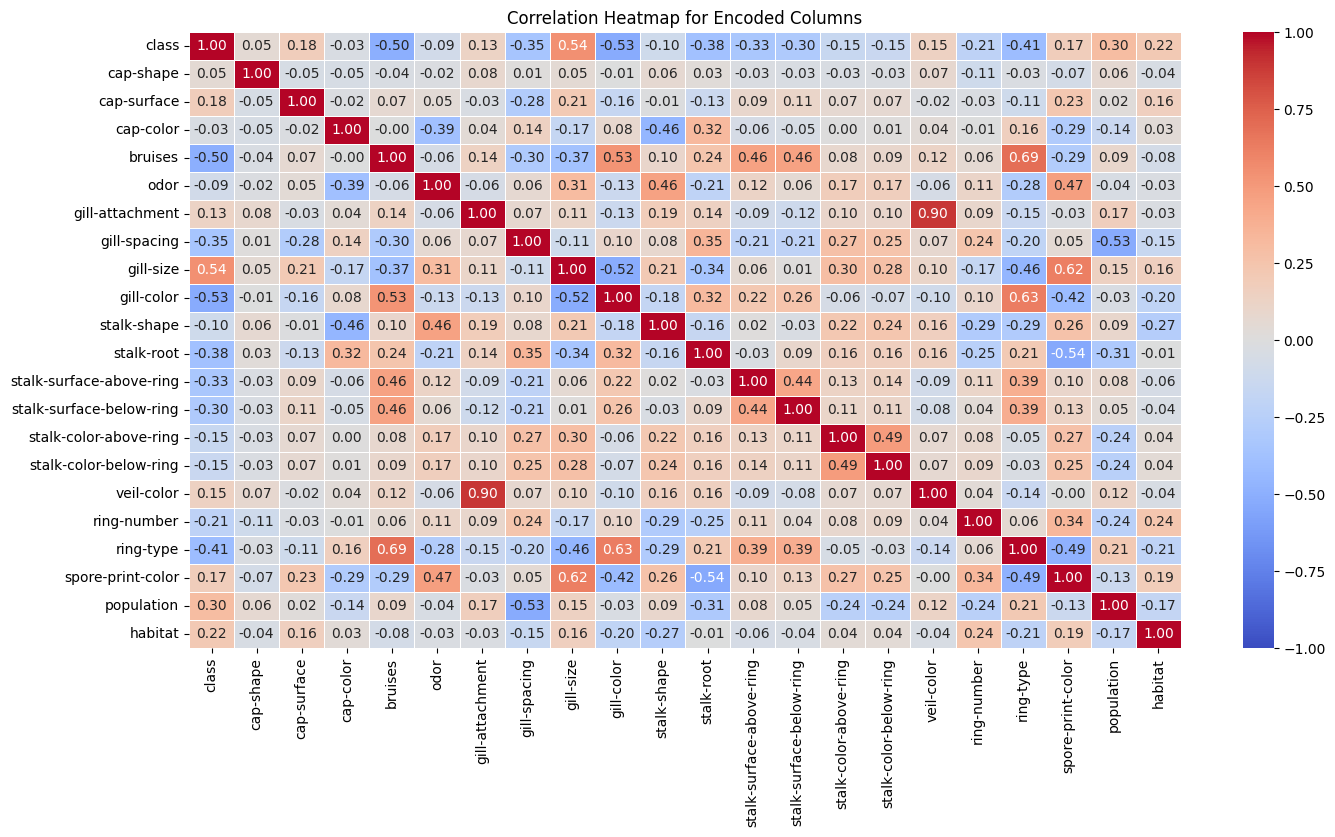

In [15]:
# Create the correlation matrix for the numerical columns
correlation_matrix = df.corr()

# Set the size of the plot
plt.figure(figsize=(16, 8))

# Create a heatmap to visualize the correlation matrix
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5, vmin=-1, vmax=1)

# Set the title of the heatmap
plt.title('Correlation Heatmap for Encoded Columns')

# Show the plot
plt.show()

Drop features with weak correlation to the target (class) column

In [16]:
# Step to drop features with weak correlation to the target (class) column
target_column = 'class'  # Define the target column
correlation_with_target = correlation_matrix[target_column]  # Get correlation of each feature with the target column

# Set a threshold for weak correlation (e.g., 0.25)
threshold = 0.25

# Identify columns to drop: those with correlation < threshold with the target
columns_to_drop = correlation_with_target[abs(correlation_with_target) < threshold].index.tolist()

# Remove the target column from being dropped
columns_to_drop = [col for col in columns_to_drop if col != target_column]

# Drop the identified columns from the original dataset (df)
df.drop(columns=columns_to_drop, inplace=True)

# Show the columns that were dropped and the remaining columns in the original df
print(f"Columns dropped: {columns_to_drop}")
print(f"Remaining columns: {df.columns}")

Columns dropped: ['cap-shape', 'cap-surface', 'cap-color', 'odor', 'gill-attachment', 'stalk-shape', 'stalk-color-above-ring', 'stalk-color-below-ring', 'veil-color', 'ring-number', 'spore-print-color', 'habitat']
Remaining columns: Index(['class', 'bruises', 'gill-spacing', 'gill-size', 'gill-color',
       'stalk-root', 'stalk-surface-above-ring', 'stalk-surface-below-ring',
       'ring-type', 'population'],
      dtype='object')


In [17]:
# Check the dataset
df.head()

,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,population
0,1,1,0,1,4,3,2,2,4,3
1,0,1,0,0,4,2,2,2,4,2
2,0,1,0,0,5,2,2,2,4,2
3,1,1,0,1,5,3,2,2,4,3
4,0,0,1,0,4,3,2,2,0,0


Outliers

In [18]:
# Select numerical columns (encoded columns)
numerical_columns = df.select_dtypes(include='number').columns.tolist()

# Define custom colors for the box plots
box_colors = {
    'class': 'blue',
    'bruises': 'magenta',
    'gill-spacing': 'green',
    'gill-size': 'grey',
    'gill-color': 'yellow',
    'stalk-root': 'red',
    'stalk-surface-above-ring': 'blue',
    'stalk-surface-below-ring': 'magenta',
    'ring-type': 'grey',
    'population': 'yellow',
}

# Set the number of columns and rows for the subplots
n_cols = 5
n_rows = (len(numerical_columns) // n_cols) + (1 if len(numerical_columns) % n_cols > 0 else 0)

# Create a subplot grid based on the new layout
fig = make_subplots(
    rows=n_rows, cols=n_cols,
    vertical_spacing=0.1  # Increased vertical spacing for better readability
)

# Loop over each numerical column to create box plots
for i, column in enumerate(numerical_columns):
    # Determine the row and column index for subplot placement
    row = i // n_cols + 1
    col = i % n_cols + 1

    # Add a box plot for the current column's values
    fig.add_trace(
        go.Box(
            y=df[column],
            name=column,
            marker=dict(color=box_colors.get(column, 'lightgray')),  # Set color for the box
            boxmean='sd',  # Add mean and standard deviation lines
            boxpoints='all',  # Show all points (including outliers)
            jitter=0.5,  # Slight jitter for better visualization of points
            pointpos=0,  # Position of outliers along the x-axis
        ),
        row=row, col=col
    )

# Update layout to improve visualization
fig.update_layout(
    title="Outlier Detection in Numerical Features",
    showlegend=False,  # No need for legend since titles are self-explanatory
    height=800,  # Adjust the height for a larger subplot grid
    width=1000,  # Adjust the width for a better aspect ratio
    title_x=0.5,  # Center the title
    plot_bgcolor='lightgrey',  # Set background color for the plot area
    paper_bgcolor='lightgrey',  # Set paper background color
    font=dict(color='black'),  # Set font color for better contrast
    xaxis_title="Feature",  # Title for x-axis
    yaxis_title="Value",  # Title for y-axis
)

# Show the plot
fig.show()

In [19]:
# Check the ranges of the columns that present outliers
for col in ['gill-spacing', 'stalk-root', 'population']:
    print(f"{col} - Min: {df[col].min()}, Max: {df[col].max()}")

gill-spacing - Min: 0, Max: 1
stalk-root - Min: 0, Max: 4
population - Min: 0, Max: 5


Note: Even though the columns 'gill-spacing', 'stalk-root', and 'population' present outliers, the small range of values suggests that no noise-reduction technique (like Winsorization) is necessary. There are no extreme or erroneous outliers that could distort the analysis. Given that these features have small ranges, any outliers are likely part of the natural variation of the data. In such cases, applying Winsorization might remove valid data points, which could reduce the accuracy of the analysis.

Descriptive Statistics

In [20]:
# check the size of tha DataFrame (rows and columns).
df.shape

(8124, 10)

In [21]:
# compute and interpret the mean, median, quartiles and standard deviation of the dataset.
df.describe().round(2)

,class,bruises,gill-spacing,gill-size,gill-color,stalk-root,stalk-surface-above-ring,stalk-surface-below-ring,ring-type,population
count,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00,8124.00
mean,0.48,0.42,0.16,0.31,4.81,1.11,1.58,1.60,2.29,3.64
std,0.50,0.49,0.37,0.46,3.54,1.06,0.62,0.68,1.80,1.25
min,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,0.00,0.00,0.00,0.00,2.00,0.00,1.00,1.00,0.00,3.00
50%,0.00,0.00,0.00,0.00,5.00,1.00,2.00,2.00,2.00,4.00
75%,1.00,1.00,0.00,1.00,7.00,1.00,2.00,2.00,4.00,4.00
max,1.00,1.00,1.00,1.00,11.00,4.00,3.00,3.00,4.00,5.00


Normal Distribution (Kurtosis Test)

Kurtosis for 'class': -1.9948
Kurtosis for 'bruises': -1.8826
Kurtosis for 'gill-spacing': 1.3847
Kurtosis for 'gill-size': -1.3183
Kurtosis for 'gill-color': -1.2861
Kurtosis for 'stalk-root': 0.0890
Kurtosis for 'stalk-surface-above-ring': 0.2395
Kurtosis for 'stalk-surface-below-ring': 0.2288
Kurtosis for 'ring-type': -1.7085
Kurtosis for 'population': 1.6748


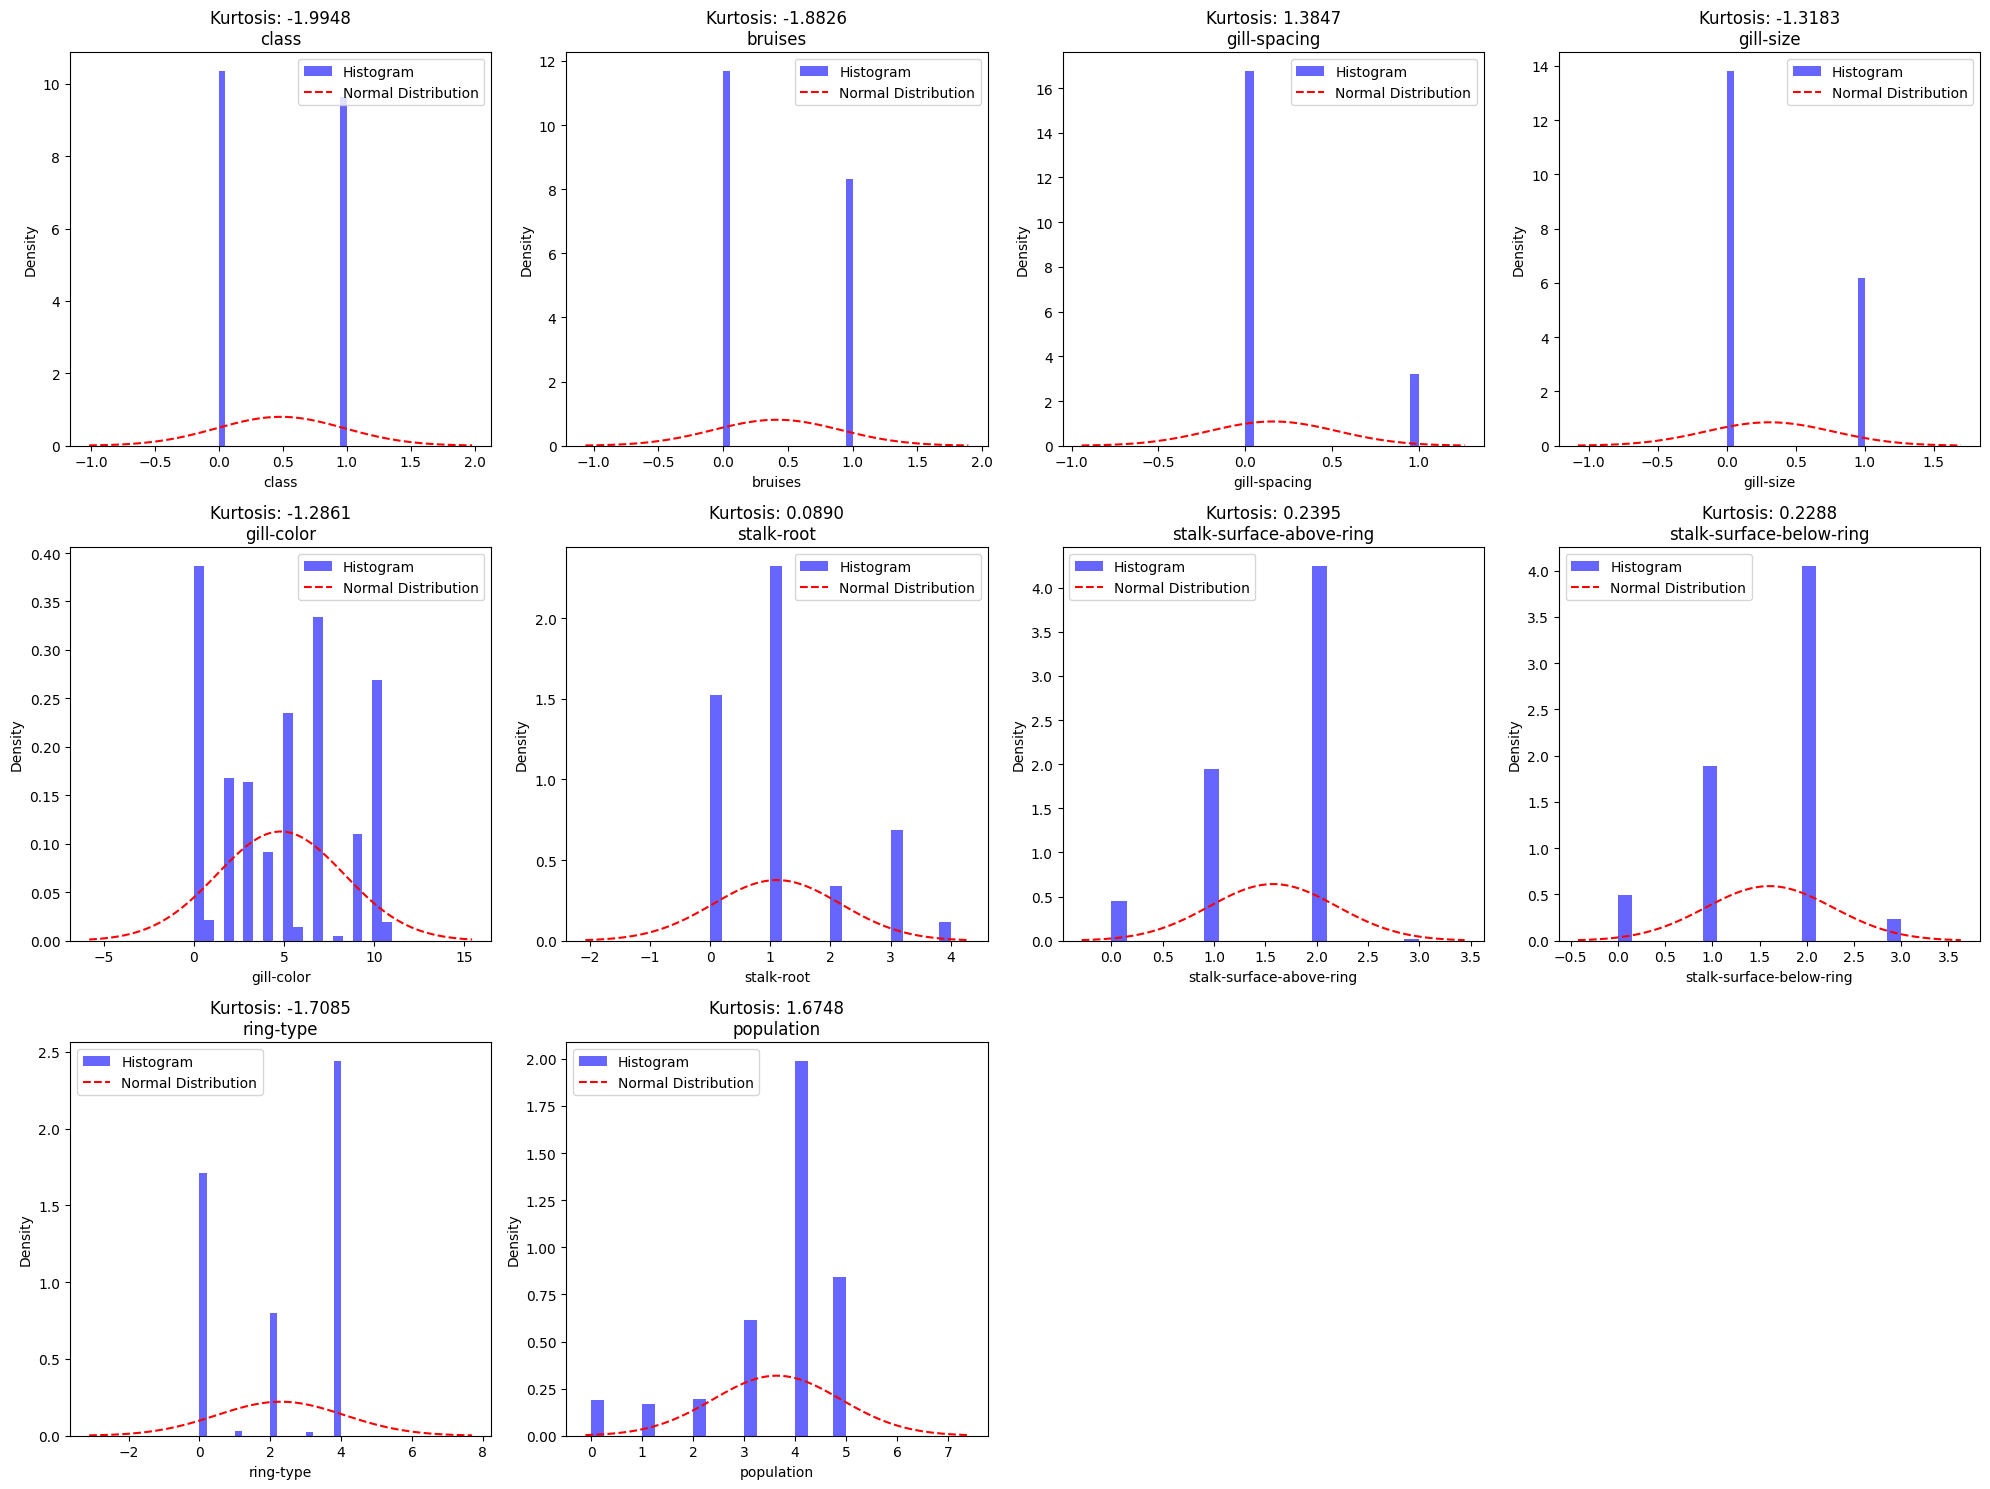

In [22]:
# Select numerical columns (encoded columns)
columns_to_test = df.select_dtypes(include='number').columns.tolist()

# Determine the number of rows and columns needed for subplots
n_cols = 4
n_rows = (len(columns_to_test) // n_cols) + (len(columns_to_test) % n_cols > 0)  # Add an extra row if there's a remainder

# Create subplots with a dynamic grid size
fig, axes = plt.subplots(n_rows, n_cols, figsize=(20, n_rows * 5))

# Flatten axes array in case it's a 2D array
axes = axes.flatten()

# Loop over each column to calculate kurtosis
for i, column in enumerate(columns_to_test):
    # Drop NaN values before applying the tests
    column_data = df[column].dropna()

    # Calculate kurtosis
    kurt = stats.kurtosis(column_data)

    # Output the kurtosis result
    print(f"Kurtosis for '{column}': {kurt:.4f}")

    # Calculate mean and standard deviation for the normal distribution curve
    mean = np.mean(column_data)
    std_dev = np.std(column_data)

    # Create a range of values for the x-axis (within 3 standard deviations)
    x = np.linspace(mean - 3 * std_dev, mean + 3 * std_dev, 100)

    # Calculate the normal distribution (PDF) using the mean and standard deviation
    pdf = stats.norm.pdf(x, mean, std_dev)

    # Plot the histogram and normal distribution curve
    axes[i].hist(column_data, bins=20, density=True, alpha=0.6, color='blue', label='Histogram')
    axes[i].plot(x, pdf, color='red', linestyle='--', label='Normal Distribution')

    # Title with kurtosis value
    axes[i].set_title(f"Kurtosis: {kurt:.4f}\n{column}")
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Density')
    axes[i].legend()

# Hide any unused subplots
for j in range(i + 1, len(axes)):
    axes[j].axis('off')  # Hide unused axes

# Adjust layout for better readability
plt.tight_layout()
plt.show()

Note: Kurtosis test interpretation:
*   Kurtosis around 0: Indicates a normal distribution (mesokurtic).
*   Kurtosis > 0: Indicates a distribution with heavy tails (leptokurtic).
*   Kurtosis < 0: Indicates a distribution with light tails (platykurtic).

- Normal Distribution (Kurtosis close to 0): stalk-root, stalk-surface-above-ring, and stalk-surface-below-ring.

The following columns are likely not normally distributed based on their kurtosis values:

*   Platykurtic: class, bruises, gill-size, gill-color, and ring-type.
*   Leptokurtic: gill-spacing, and population.

Note II: After testing the Logarithmic, Square Root, and Box-Cox Transformations, it was found that none of them brought the data to a normal distribution. Therefore, it was decided to apply the MinMaxScaler, as this technique is effective in scaling the data within a specific range [0, 1], while preserving the relationships between the variables. The tests performed and their analyses can be found at the end of this notebook as evidence of the approach taken.

Q6: Machine Learning Algorithms for Mushroom Classification

In [23]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split

# Apply MinMaxScaler to features (excluding 'class')
scaler = MinMaxScaler()
X_scaled = scaler.fit_transform(df.drop('class', axis=1))  # Apply MinMaxScaler to features

# Target variable remains unchanged
y = df['class']

# Split the data into training and testing sets (80% training, 20% testing)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

# Verify the split
print(f"Training set size: {X_train.shape[0]}, Test set size: {X_test.shape[0]}")

Training set size: 6499, Test set size: 1625


In [24]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
import xgboost as xgb

# Define a function to train models and evaluate performance
def evaluate_model(model, X_train, X_test, y_train, y_test):
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    # Calculate evaluation metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    return accuracy, precision, recall, f1

# List of models to evaluate
models = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced')),
    ('Logistic Regression', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('Support Vector Classification', SVC(class_weight='balanced')),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('XGBoost', xgb.XGBClassifier(scale_pos_weight=1))  # Adjust based on imbalance
]

# Initialize a list to store model performance results
results = []

# Evaluate each model and store the results
for name, model in models:
    accuracy, precision, recall, f1 = evaluate_model(model, X_train, X_test, y_train, y_test)

    # Append the results
    results.append({
        "Model": name,
        "Accuracy": accuracy,
        "Precision": precision,
        "Recall": recall,
        "F1-Score": f1
    })

# Convert the results into a DataFrame
results_df = pd.DataFrame(results)

# Rank models based on each metric and the average of all metrics
results_df['Average Score'] = results_df[['Accuracy', 'Precision', 'Recall', 'F1-Score']].mean(axis=1)

# Sort models based on the average score
results_df = results_df.sort_values(by='Average Score', ascending=False)

# Reset the index (so it doesn't show the default)
results_df.reset_index(drop=True, inplace=True)

# Display the ranked models
print(results_df[['Model', 'Accuracy', 'Precision', 'Recall', 'F1-Score', 'Average Score']])

                           Model  Accuracy  Precision    Recall  F1-Score  \
0                  Random Forest  0.995692   0.995728  0.995692  0.995692   
1                  Decision Tree  0.995692   0.995728  0.995692  0.995692   
2            K-Nearest Neighbors  0.995692   0.995728  0.995692  0.995692   
3                        XGBoost  0.995692   0.995728  0.995692  0.995692   
4  Support Vector Classification  0.984000   0.984479  0.984000  0.983986   
5            Logistic Regression  0.939692   0.939819  0.939692  0.939664   
6           Gaussian Naive Bayes  0.891077   0.894623  0.891077  0.890599   

   Average Score  
0       0.995701  
1       0.995701  
2       0.995701  
3       0.995701  
4       0.984116  
5       0.939717  
6       0.891844  


Visualization: Models Comparison

Q7. Based on the performance metrics from Q6, determine which algorithm provides the best model for
predicting whether a mushroom is edible or poisonous. Justify your choice by comparing accuracy, precision,
recall, and F1-score across models.

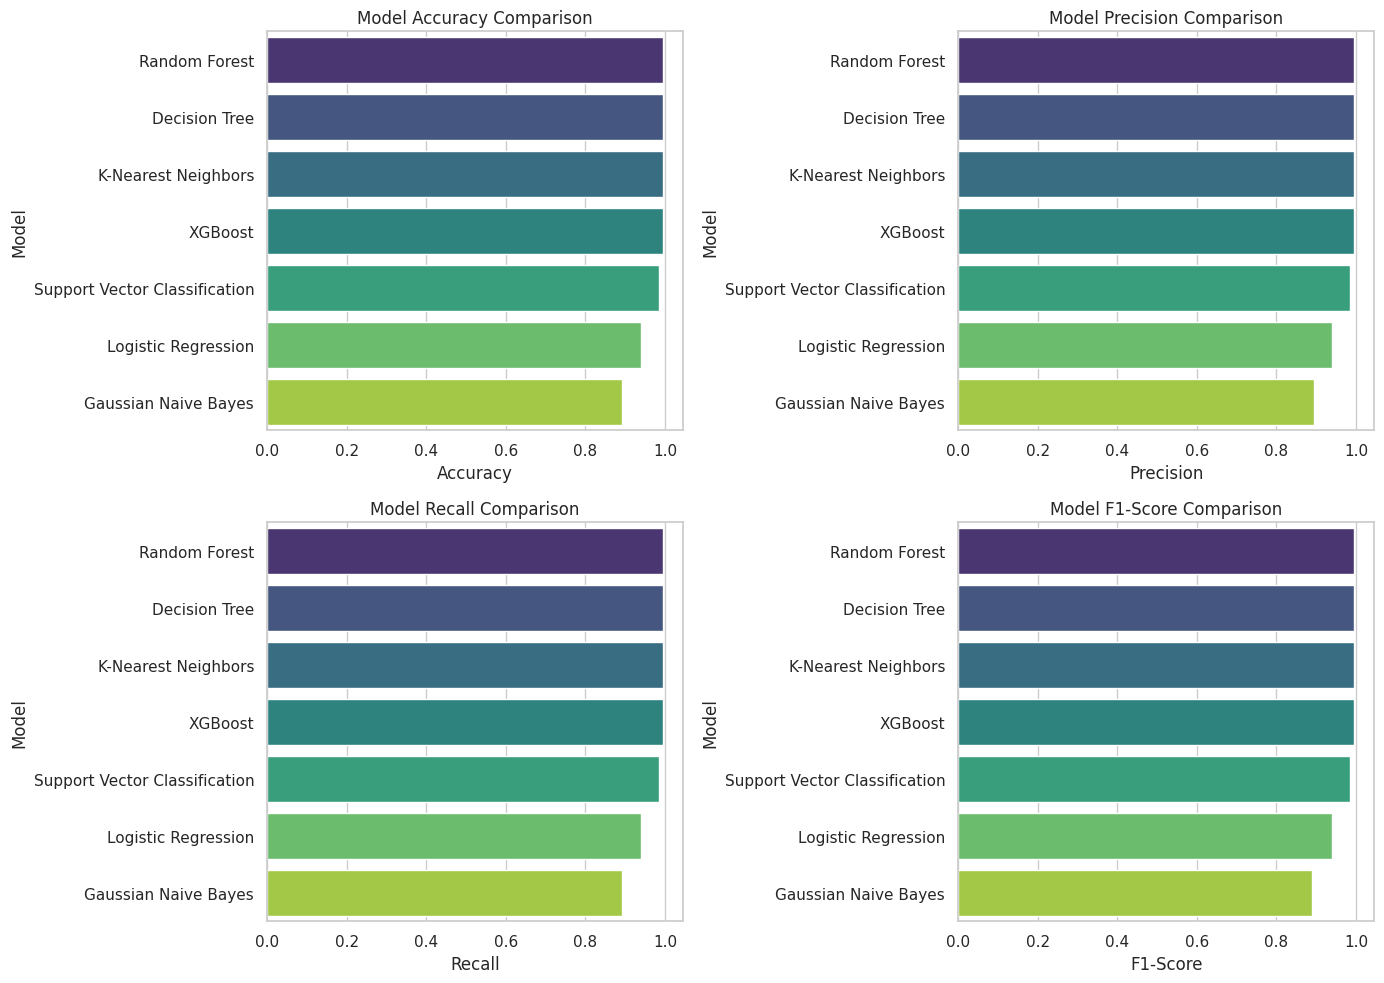

In [25]:
# Set up the seaborn style for better visuals
sns.set(style="whitegrid")

# Create a figure and axes for subplots
fig, axes = plt.subplots(2, 2, figsize=(14, 10))

# Plot Accuracy
sns.barplot(x='Accuracy', y='Model', data=results_df, ax=axes[0, 0], palette='viridis')
axes[0, 0].set_title('Model Accuracy Comparison')

# Plot Precision
sns.barplot(x='Precision', y='Model', data=results_df, ax=axes[0, 1], palette='viridis')
axes[0, 1].set_title('Model Precision Comparison')

# Plot Recall
sns.barplot(x='Recall', y='Model', data=results_df, ax=axes[1, 0], palette='viridis')
axes[1, 0].set_title('Model Recall Comparison')

# Plot F1-Score
sns.barplot(x='F1-Score', y='Model', data=results_df, ax=axes[1, 1], palette='viridis')
axes[1, 1].set_title('Model F1-Score Comparison')

# Adjust layout
plt.tight_layout()
plt.show()

Overfitting vs. Underfitting

In [26]:
# Function to check overfitting and underfitting
def check_overfitting_underfitting(model, X_train, X_test, y_train, y_test, model_name):
    # Train the model
    model.fit(X_train, y_train)

    # Predictions on train and test sets
    accuracy_train = accuracy_score(y_train, model.predict(X_train))
    accuracy_test = accuracy_score(y_test, model.predict(X_test))

    # Calculate overfitting risk (difference between train and test accuracy)
    overfitting_risk = accuracy_train - accuracy_test

    # Check for underfitting (both train and test accuracies are low)
    underfitting_risk = accuracy_train < 0.7 and accuracy_test < 0.7

    # Return overfitting or underfitting result
    if overfitting_risk > 0.05:  # Overfitting if the difference is large
        return f"{model_name} is overfitting"
    elif underfitting_risk:
        return f"{model_name} is underfitting"
    else:
        return f"{model_name} is neither overfitting nor underfitting"

# List of models with their names
models = [
    ('Gaussian Naive Bayes', GaussianNB()),
    ('Random Forest', RandomForestClassifier(class_weight='balanced')),
    ('Decision Tree', DecisionTreeClassifier(class_weight='balanced')),
    ('Logistic Regression', LogisticRegression(max_iter=1000, class_weight='balanced')),
    ('Support Vector Classification', SVC(class_weight='balanced')),
    ('K-Nearest Neighbors', KNeighborsClassifier()),
    ('XGBoost', xgb.XGBClassifier(scale_pos_weight=1))
]

# Evaluate overfitting and underfitting for all models
for model_name, model in models:
    result = check_overfitting_underfitting(model, X_train, X_test, y_train, y_test, model_name)
    print(result)

Gaussian Naive Bayes is neither overfitting nor underfitting
Random Forest is neither overfitting nor underfitting
Decision Tree is neither overfitting nor underfitting
Logistic Regression is neither overfitting nor underfitting
Support Vector Classification is neither overfitting nor underfitting
K-Nearest Neighbors is neither overfitting nor underfitting
XGBoost is neither overfitting nor underfitting


Reference:
- https://github.com/usmanakhtar/Mushrooms-dataset

**Appendix:**

The codes below were used to apply transformations to the non-normal data columns and recalculate the **kurtosis** of each. The generated output has been recorded below for reference.

**Log Transformation and Kurtosis Calculation**

```python
#### List of columns that are non-normal (from the kurtosis results)
columns_to_transform = ['class', 'bruises', 'gill-spacing', 'gill-size',
                        'gill-color', 'ring-type', 'population']

#### Apply log transformation, round the values and recalculate kurtosis
for col in columns_to_transform:
    # Apply the log transformation (add 1 to avoid log(0) for non-positive values)
    df[col] = np.log(df[col] + 1)

    # Round the transformed values to 2 decimal places
    df[col] = df[col].round(2)

    # Drop NaN values before calculating kurtosis
    column_data = df[col].dropna()

    # Recalculate kurtosis for the transformed data
    kurt = stats.kurtosis(column_data)

    # Output the new kurtosis result
    print(f"Kurtosis after log transformation for '{col}': {kurt:.4f}")

    
- Kurtosis after log transformation for 'class': -1.9948
- Kurtosis after log transformation for 'bruises': -1.8826
- Kurtosis after log transformation for 'gill-spacing': 1.3847
- Kurtosis after log transformation for 'gill-size': -1.3183
- Kurtosis after log transformation for 'gill-color': -0.8812
- Kurtosis after log transformation for 'ring-type': -1.6015
- Kurtosis after log transformation for 'population': 5.7322

**Square root transformation**

```python

from scipy.stats import skew

#### List of columns that need transformation (those with non-normal distribution)
columns_to_transform = ['class', 'bruises', 'gill-spacing', 'gill-size',
                        'gill-color', 'ring-type', 'population']

#### Calculate and print the skewness before and after transformation
for col in columns_to_transform:
    # Calculate skewness before transformation
    skew_before = skew(df[col].dropna())

    # Apply square root transformation (add 1 to avoid sqrt(0) for non-positive values)
    df[col] = np.sqrt(df[col] + 1)

    # Calculate skewness after transformation
    skew_after = skew(df[col].dropna())

    # Output the skewness results
    print(f"Skewness for '{col}' before transformation: {skew_before:.4f}")
    print(f"Skewness for '{col}' after transformation: {skew_after:.4f}")
    print('-' * 50)

- Skewness for 'class' before transformation: 0.0719
- Skewness for 'class' after transformation: 0.0719
--------------------------------------------------
- Skewness for 'bruises' before transformation: 0.3427
- Skewness for 'bruises' after transformation: 0.3427
--------------------------------------------------
- Skewness for 'gill-spacing' before transformation: 1.8397
- Skewness for 'gill-spacing' after transformation: 1.8397
--------------------------------------------------
- Skewness for 'gill-size' before transformation: 0.8256
- Skewness for 'gill-size' after transformation: 0.8256
--------------------------------------------------
- Skewness for 'gill-color' before transformation: 0.0614
- Skewness for 'gill-color' after transformation: -0.3371
--------------------------------------------------
- Skewness for 'ring-type' before transformation: -0.2900
- Skewness for 'ring-type' after transformation: -0.3936
--------------------------------------------------
- Skewness for 'population' before transformation: -1.4128
- Skewness for 'population' after transformation: -1.9054
--------------------------------------------------

**Box-Cox transformation**

```python

from scipy.stats import skew, boxcox

#### List of columns to apply Box-Cox transformation
columns_to_transform = ['class', 'bruises', 'gill-spacing', 'gill-size',
                        'gill-color', 'ring-type', 'population']

#### Apply Box-Cox transformation
for col in columns_to_transform:
    # Calculate skewness before transformation
    skew_before = skew(df[col].dropna())

    # Ensure no zero or negative values by shifting the column if necessary
    if (df[col] <= 0).any():  # Check if the column contains non-positive values
        df[col] = df[col] + abs(df[col].min()) + 1  # Shift all values to be positive
    
    # Apply Box-Cox transformation
    df[col], _ = boxcox(df[col])
    
    # Calculate skewness after transformation
    skew_after = skew(df[col].dropna())

    # Output the skewness results
    print(f"Skewness for '{col}' before transformation: {skew_before:.4f}")
    print(f"Skewness for '{col}' after transformation: {skew_after:.4f}")
    print('-' * 50)

- Skewness for 'class' before transformation: 0.0719
- Skewness for 'class' after transformation: 0.0719
--------------------------------------------------
- Skewness for 'bruises' before transformation: 0.3427
- Skewness for 'bruises' after transformation: 0.3427
--------------------------------------------------
- Skewness for 'gill-spacing' before transformation: 1.8397
- Skewness for 'gill-spacing' after transformation: 1.8397
--------------------------------------------------
- Skewness for 'gill-size' before transformation: 0.8256
- Skewness for 'gill-size' after transformation: 0.8256
--------------------------------------------------
- Skewness for 'gill-color' before transformation: -0.2979
- Skewness for 'gill-color' after transformation: -0.3074
--------------------------------------------------
- Skewness for 'ring-type' before transformation: -0.3571
- Skewness for 'ring-type' after transformation: -0.3640
--------------------------------------------------
- Skewness for 'population' before transformation: -0.2941
- Skewness for 'population' after transformation: -0.2896